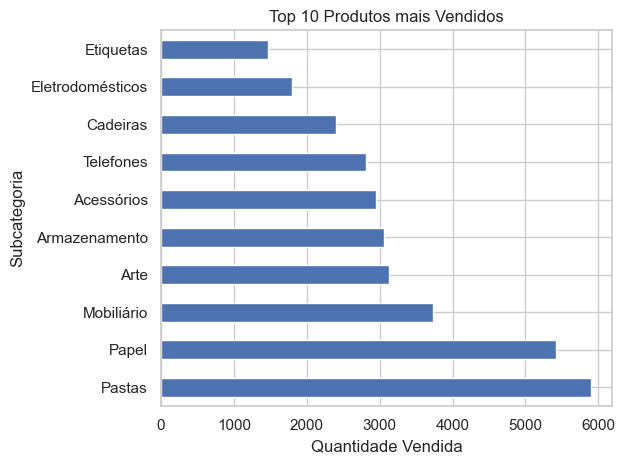

C:\Users\Pedro Averame\AppData\Local\Temp\ipykernel_24296\2679979835.py:33: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  lucro_por_unidade = df.groupby('subcategoria').apply(lambda x: x['lucro'].sum() / x['quantidade'].sum())


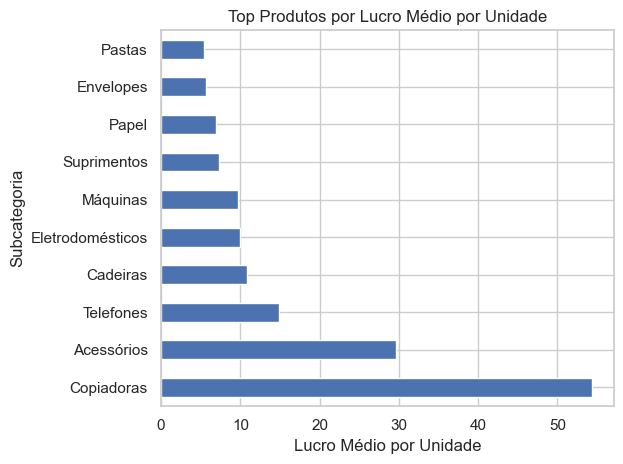

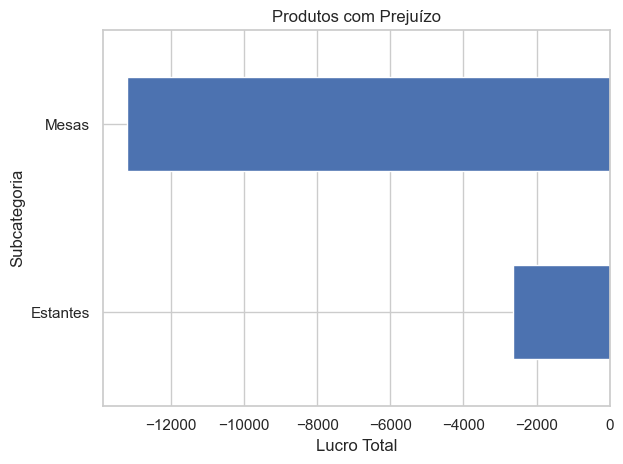

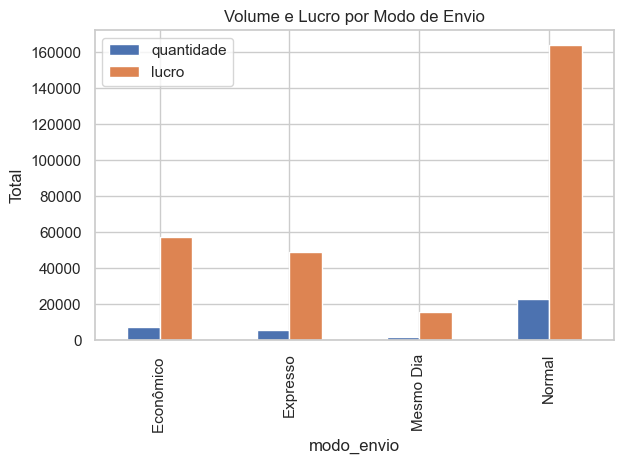

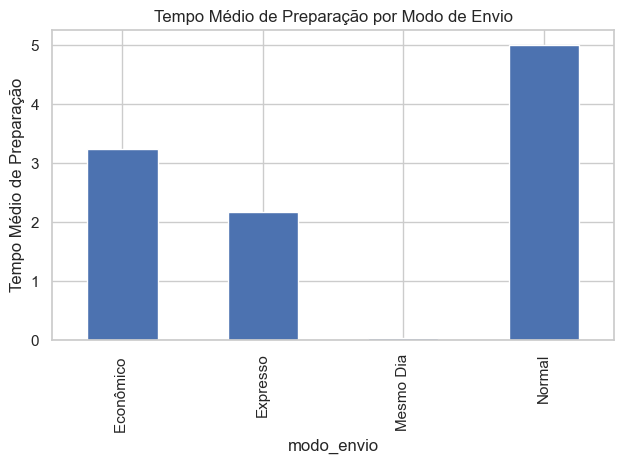

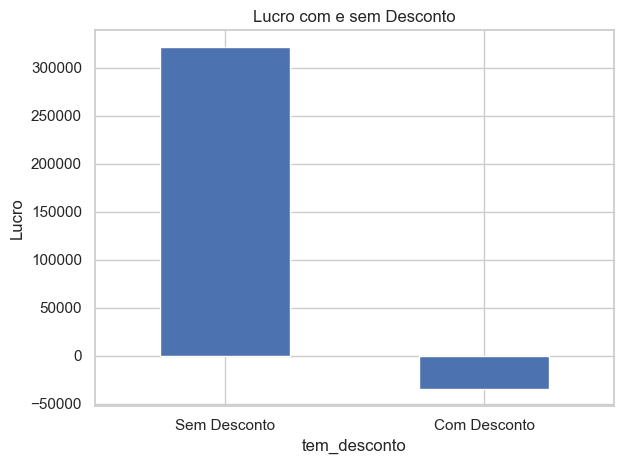


==== Indicadores Resumo ====
Total de Vendas: 2,297,200.86
Total de Lucro: 286,397.02
Ticket Médio: 229.86
Total de Pedidos: 9994
Tempo Médio de Preparação: 3.96 dias


In [ ]:
# pip install pandas matplotlib seaborn openpyxl

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar o arquivo
arquivo = "Data/dados_amr.xlsx"
df = pd.read_excel(arquivo, sheet_name='Base_Limpa')

# Garantir que a coluna de datas está em datetime
df['data_pedido'] = pd.to_datetime(df['data_pedido'], errors='coerce')

# Criar colunas adicionais para análise temporal
df['ano'] = df['data_pedido'].dt.year
df['mes'] = df['data_pedido'].dt.month
df['dia_semana'] = df['data_pedido'].dt.day_name()

# Configurações visuais
sns.set_theme(style="whitegrid")



# 2. Top 10 Produtos mais Vendidos
top_produtos = df.groupby('subcategoria')['quantidade'].sum().sort_values(ascending=False).head(10)
top_produtos.plot(kind='barh', title='Top 10 Produtos mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Subcategoria')
plt.tight_layout()
plt.show()

# 3. Produtos com Maior Lucro Médio por Unidade Vendida
lucro_por_unidade = df.groupby('subcategoria').apply(lambda x: x['lucro'].sum() / x['quantidade'].sum())
top_lucro_unitario = lucro_por_unidade.sort_values(ascending=False).head(10)
top_lucro_unitario.plot(kind='barh', title='Top Produtos por Lucro Médio por Unidade')
plt.xlabel('Lucro Médio por Unidade')
plt.ylabel('Subcategoria')
plt.tight_layout()
plt.show()

# 4. Produtos com Prejuízo
produtos_prejuizo = df.groupby('subcategoria')['lucro'].sum()
produtos_prejuizo = produtos_prejuizo[produtos_prejuizo < 0]
if not produtos_prejuizo.empty:
    produtos_prejuizo.plot(kind='barh', title='Produtos com Prejuízo')
    plt.xlabel('Lucro Total')
    plt.ylabel('Subcategoria')
    plt.tight_layout()
    plt.show()

# 5. Volume e Lucro por Modo de Envio
envio_analise = df.groupby('modo_envio')[['quantidade', 'lucro']].sum()
envio_analise.plot(kind='bar', title='Volume e Lucro por Modo de Envio')
plt.ylabel('Total')
plt.tight_layout()
plt.show()

# 6. Tempo Médio de Preparação por Modo de Envio
tempo_preparacao_envio = df.groupby('modo_envio')['tempo_preparacao'].mean()
tempo_preparacao_envio.plot(kind='bar', title='Tempo Médio de Preparação por Modo de Envio')
plt.ylabel('Tempo Médio de Preparação')
plt.tight_layout()
plt.show()


# 9. Lucro com e sem Desconto
df['tem_desconto'] = df['desconto'] > 0
lucro_desconto = df.groupby('tem_desconto')['lucro'].sum()
lucro_desconto.plot(kind='bar', title='Lucro com e sem Desconto')
plt.ylabel('Lucro')
plt.xticks([0, 1], ['Sem Desconto', 'Com Desconto'], rotation=0)
plt.tight_layout()
plt.show()



# 11. Indicadores Resumo
total_vendas = df['vendas'].sum()
total_lucro = df['lucro'].sum()
ticket_medio = df['vendas'].sum() / df['id_pedido'].nunique()
total_pedidos = df['id_pedido'].nunique()
tempo_medio_preparacao = df['tempo_preparacao'].mean()

print("\n==== Indicadores Resumo ====")
print(f"Total de Vendas: {total_vendas:,.2f}")
print(f"Total de Lucro: {total_lucro:,.2f}")
print(f"Ticket Médio: {ticket_medio:,.2f}")
print(f"Total de Pedidos: {total_pedidos}")
print(f"Tempo Médio de Preparação: {tempo_medio_preparacao:.2f} dias")
